In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('hearing_test.csv')

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
df.isna().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [5]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [6]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

In [7]:
df['Age_group'] = pd.cut(x = df['age'], bins = [10,30,50,70,90], labels = ['10-30','30-50', '50-70','70-90'])

# Visualization

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500')])

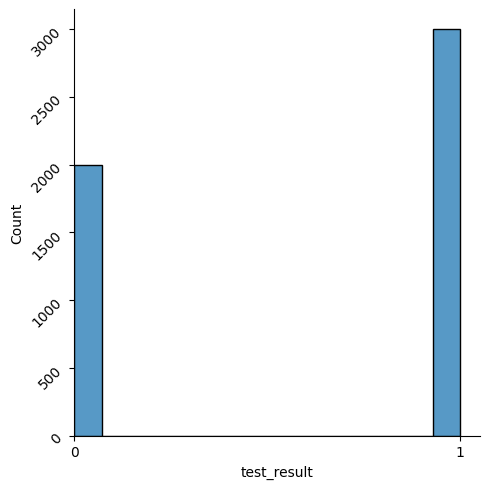

In [8]:
from matplotlib import ticker as tk
sns.displot(kind = 'hist', x = 'test_result', data = df)
ax = plt.gca()
ax.xaxis.set_major_locator(tk.MultipleLocator(1))
ax.set_xlim(0)
plt.yticks(rotation = 45)

<Axes: >

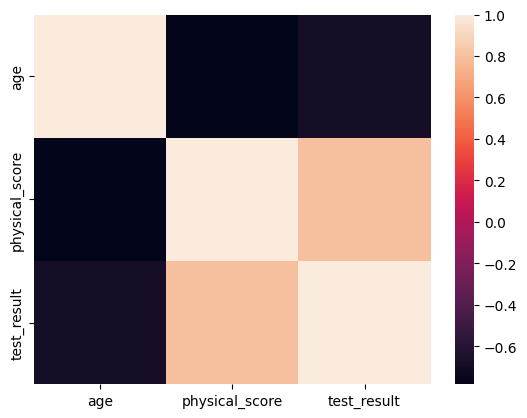

In [9]:
sns.heatmap(data = df.drop('Age_group', axis = 1).corr())

array([<Axes: title={'center': 'age'}, xlabel='[test_result]'>,
       <Axes: title={'center': 'physical_score'}, xlabel='[test_result]'>],
      dtype=object)

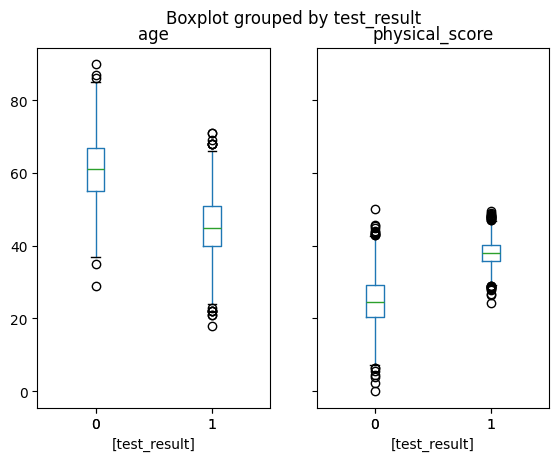

In [10]:
df.boxplot(by='test_result', grid = False)

<Axes: xlabel='age', ylabel='physical_score'>

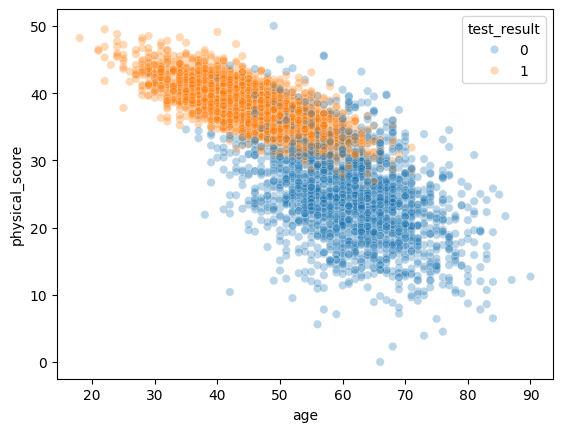

In [11]:
sns.scatterplot(data = df, x = 'age', y = 'physical_score', hue = 'test_result', alpha = 0.3)

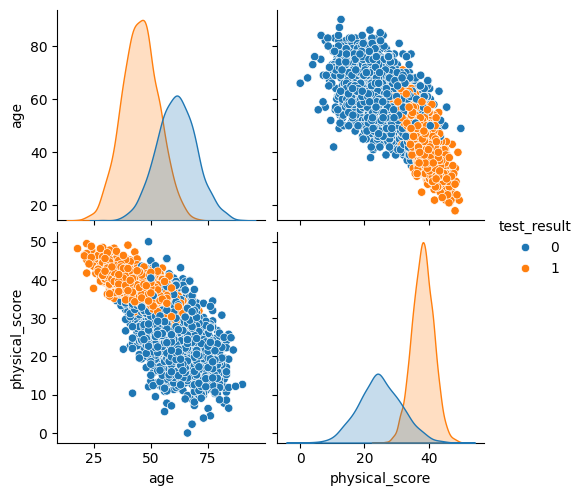

In [12]:
sns.pairplot(data = df, hue = 'test_result');

# Modeling

In [13]:
X = df.drop(axis = 1, labels = ['Age_group', 'test_result'])

In [14]:
y = df['test_result']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
scaler = StandardScaler()
fitter = scaler.fit(X_train)
scaled_X_train = fitter.transform(X_train)

In [18]:
model = LogisticRegression()

In [19]:
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [20]:
model.coef_

array([[-0.91707661,  3.45211325]])

In [21]:
scaled_X_test = scaler.transform(X_test)
test_predict = model.predict(scaled_X_test)

In [22]:
train_predict = model.predict(scaled_X_train)

# Evaluation

In [23]:
accuracy_score(y_test, test_predict)

0.9206666666666666

In [24]:
accuracy_score(y_train, train_predict)

0.9134285714285715

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

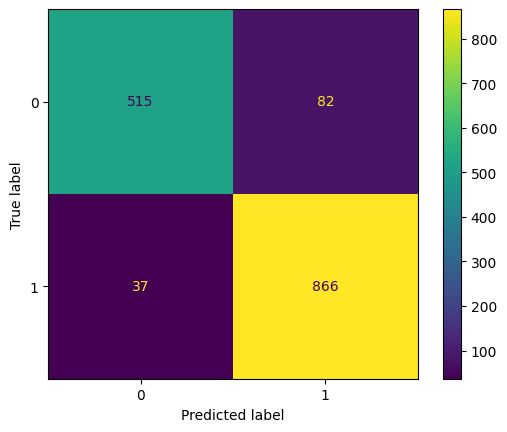

In [26]:
ConfusionMatrixDisplay(confusion_matrix(y_test, test_predict), display_labels= model.classes_).plot();

In [27]:
print(f"{classification_report(y_test, test_predict)}")

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       597
           1       0.91      0.96      0.94       903

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.92      1500
weighted avg       0.92      0.92      0.92      1500



> #### Check these values with confusion matrix above, for reference goto:
> #### 01-Logistic_regression.ipynb

In [28]:
# everything related to plot is replaced by Display
# plot_confusin_matrix() -> ConfusionMatrixDisplay()
# plot_precision_recall() -> PrecisionRecallDisplay()
# plot_roc_curve() -> RocCurveDisplay()
from sklearn.metrics import recall_score, precision_score, PrecisionRecallDisplay, RocCurveDisplay, roc_curve, auc

In [29]:
# recall_score and precision_score are showing as per the formula studied in 01-Logistic_regression
# i.e only for the ture label (1),
# these value matches to the classification_report's output --> 1
recall_score(y_test, test_predict), precision_score(y_test, test_predict)

(np.float64(0.9590254706533776), np.float64(0.9135021097046413))

In [30]:
y_score = model.predict_proba(scaled_X_test)
y_score

array([[2.42259273e-02, 9.75774073e-01],
       [2.69174142e-02, 9.73082586e-01],
       [9.88660978e-01, 1.13390220e-02],
       ...,
       [9.99188537e-01, 8.11462744e-04],
       [1.19849285e-01, 8.80150715e-01],
       [9.16600689e-02, 9.08339931e-01]])

In [31]:
fpr, tpr, threshold = roc_curve(y_test, y_score[:,1])

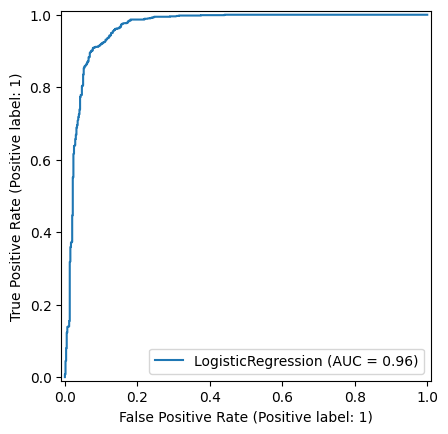

In [32]:
# using .from_estimator() method seems easy and doesnot require to explicitly calculate fpr, tpr
RocCurveDisplay.from_estimator(model, scaled_X_test, y_test)

(0.0, 1.01)

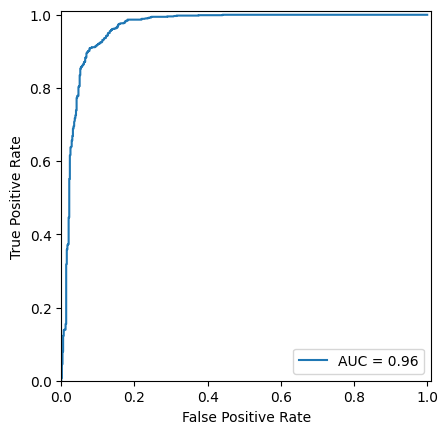

In [33]:
RocCurveDisplay(fpr = fpr,tpr = tpr, roc_auc= auc(fpr, tpr)).plot()
plt.xlim(0)
plt.ylim(0)

In [34]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

In [35]:
precision, recall, thrsh = precision_recall_curve(y_test,y_score[:,1])

In [36]:
precision, recall , thrsh

(array([0.602     , 0.6024016 , 0.60280374, ..., 1.        , 1.        ,
        1.        ]),
 array([1.        , 1.        , 1.        , ..., 0.00221484, 0.00110742,
        0.        ]),
 array([4.95384365e-07, 1.11485053e-06, 1.47426610e-06, ...,
        9.99853573e-01, 9.99876392e-01, 9.99889756e-01]))

(0.0, 1.01)

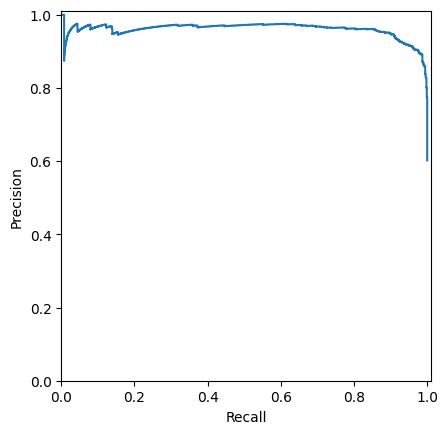

In [37]:
PrecisionRecallDisplay(precision, recall).plot()
plt.xlim(0)
plt.ylim(0)

# alternatively this plot can also be generated by PrecisionRecallDisplay.from_estimator(model, X_test, y_test)

(0.0, 1.01)

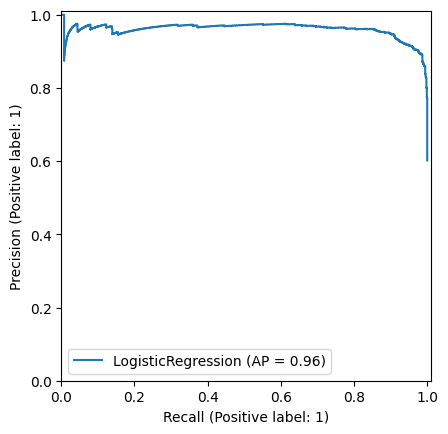

In [44]:
PrecisionRecallDisplay.from_estimator(model, scaled_X_test, y_test);
plt.xlim(0)
plt.ylim(0)